## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Table of Content</p>

* [1. What Is Web Scraping?](#1)
    * [1.1 Reasons for Web Scraping](#1.1)
    * [1.2 Challenges of Web Scraping](#1.2)
    * [1.3 An Alternative to Web Scraping: APIs](#1.3)
    
* [2. Scrape the Fake Python Job Site](#2)
  
* [3. Step 1: Inspect Your Data Source](#3)
    * [3.1 Explore the Website](#3.1)
    * [3.2 Decipher the Information in URLs](#3.2)
    * [3.3 Inspect the Site Using Developer Tools](#3.3)
* [4. Step 2: Scrape HTML Content From a Page](#4)
    * [4.1 Static Websites](#4.1)
    * [4.2 Hidden Websites](#4.2)
    * [4.3 Dynamic Websites](#4.3)
* [5. Step 3: Parse HTML Code With Beautiful Soup](#5)
    * [5.1 Find Elements by ID](#5.1)
    * [5.2 Find Elements by HTML Class Name](#5.2)
    * [5.3 Extract Text From HTML Elements](#5.3)
    * [5.4 Find Elements by Class Name and Text Content](#5.4)
    * [5.5 Pass a Function to a Beautiful Soup Method](#5.5)
    * [5.6 Identify Error Conditions](#5.6)
    * [5.7 Access Parent Elements](#5.7)
    * [5.8 Extract Attributes From HTML Elements](#5.8)





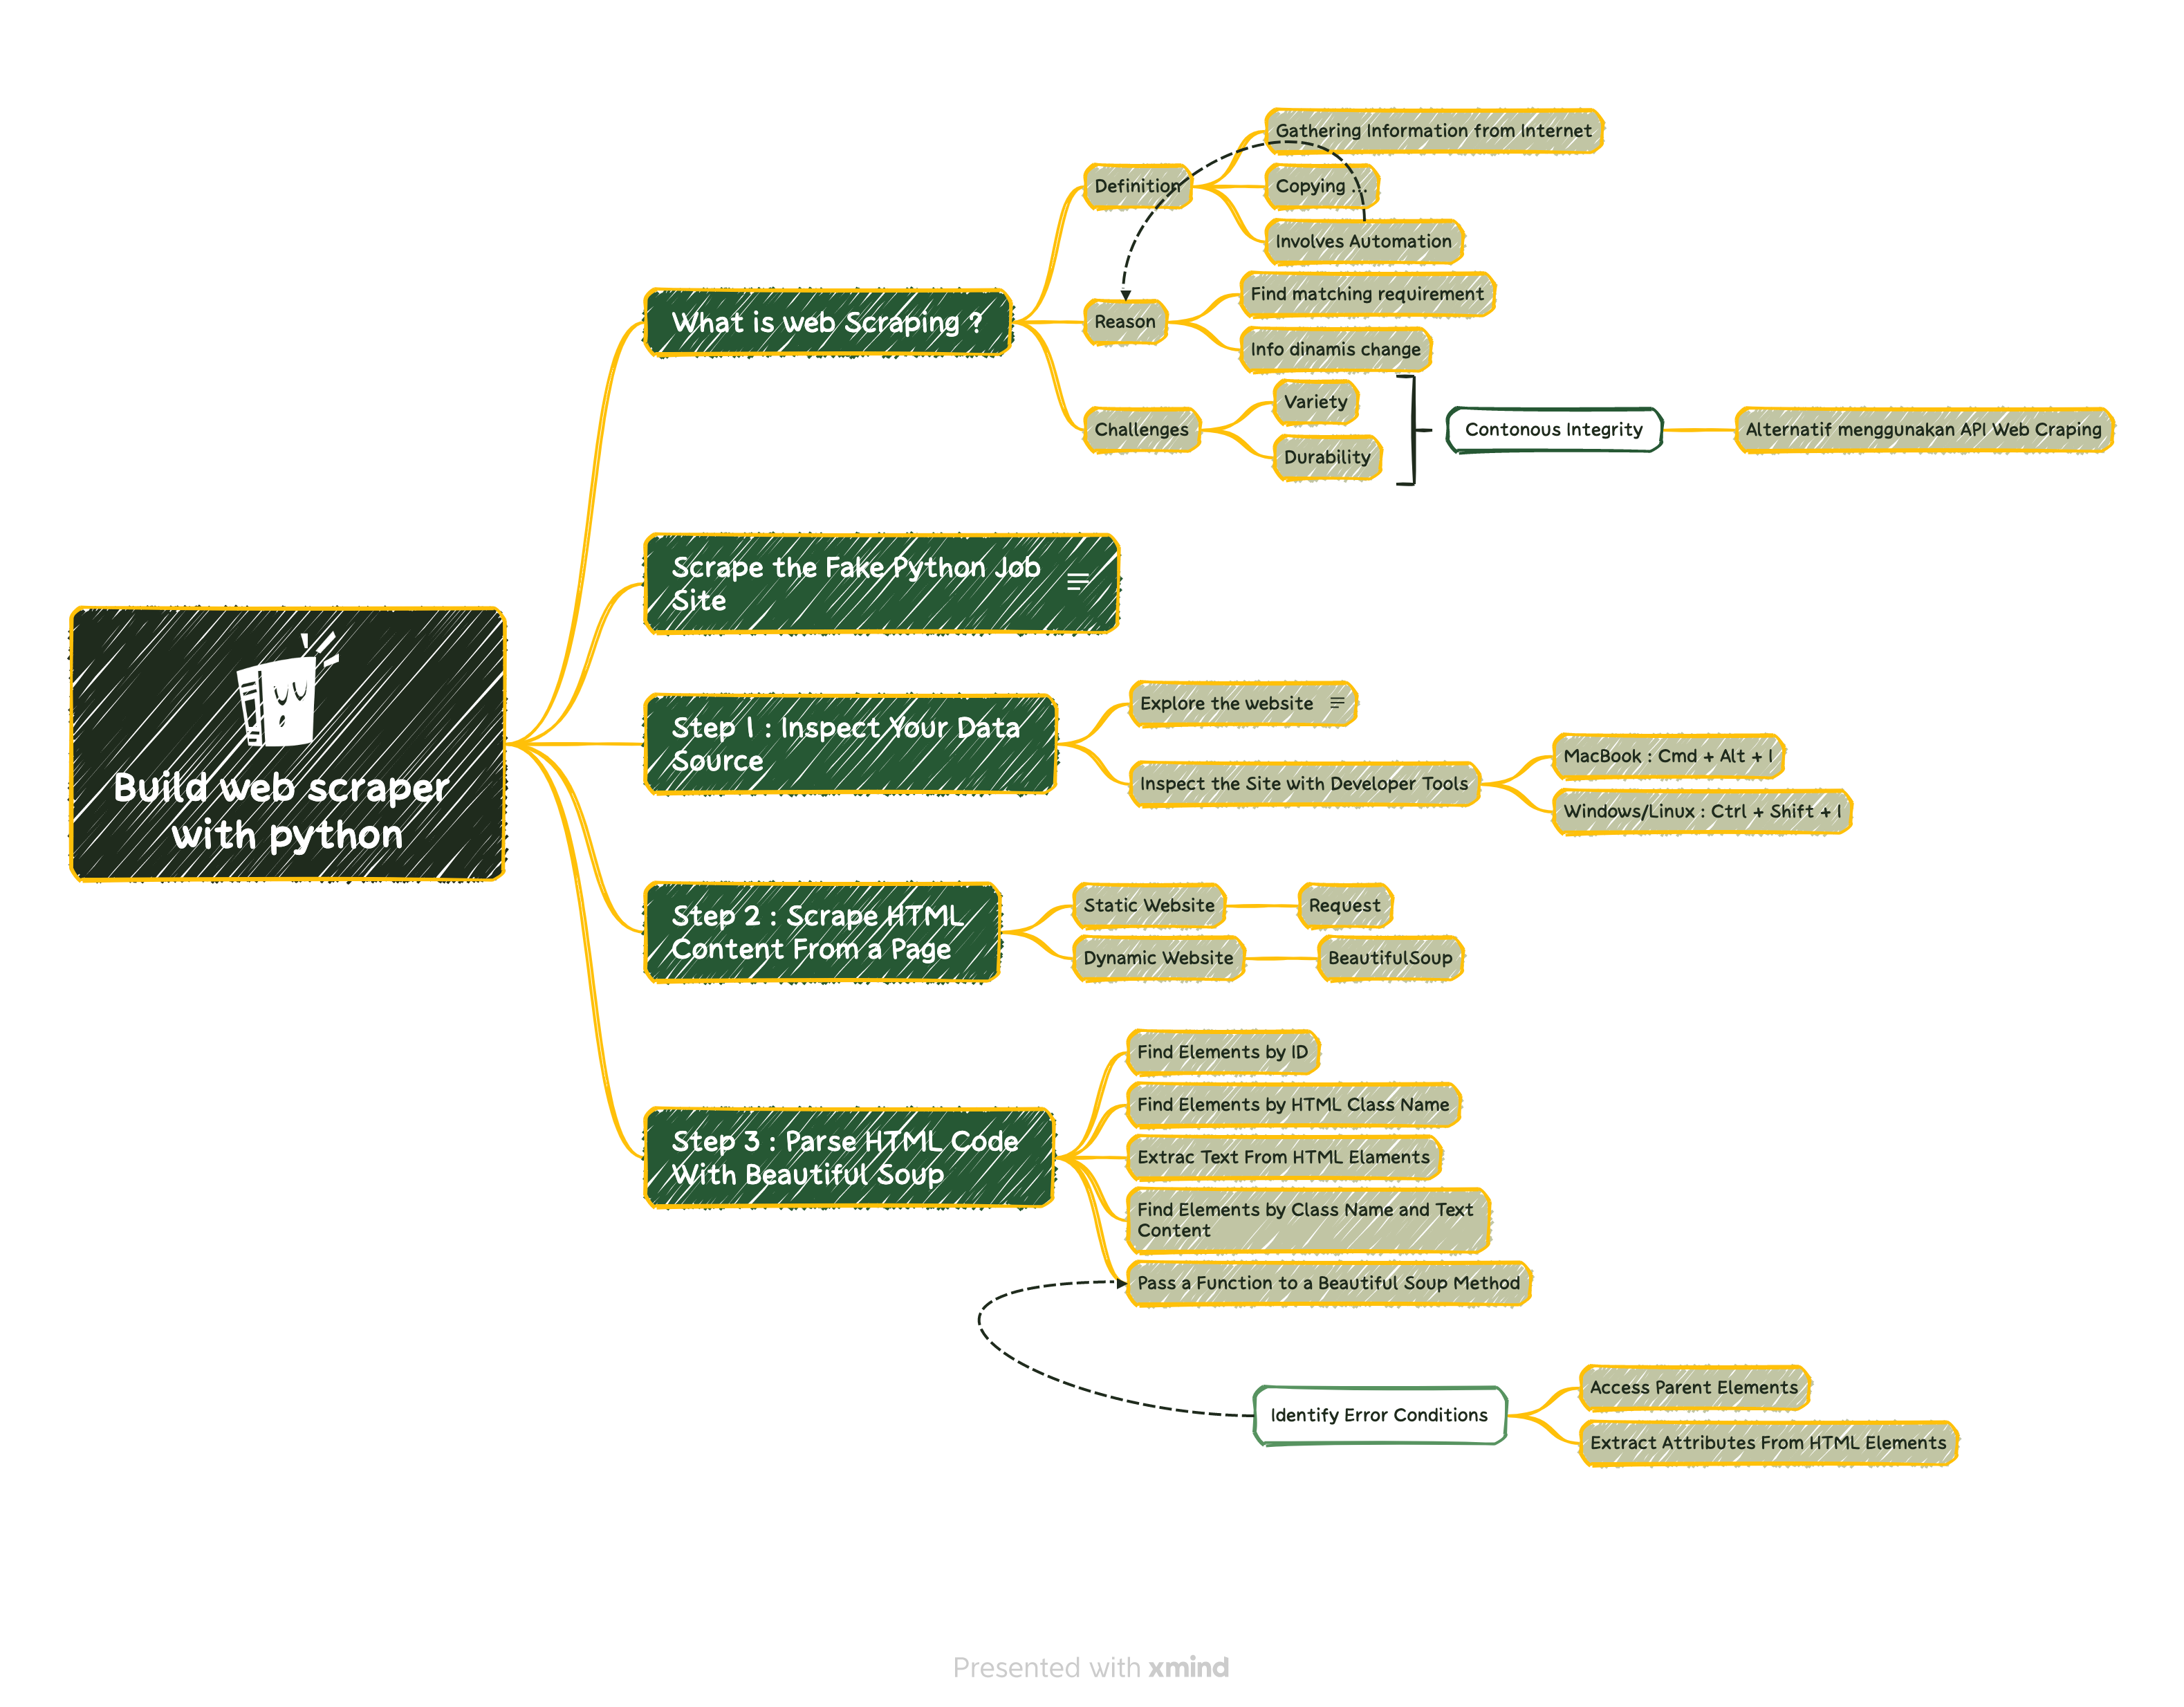

<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">1. What Is Web Scraping?</p>

In [ ]:
Bla bla bla...

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">2. Scrape the Fake Python Job Site</p>

https://realpython.github.io/fake-jobs/

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">Step 1: Inspect Your Data Source</p>

+ Anda harus memahami struktur situs untuk mengekstrak informasi yang relevan bagi Anda

<a id='3.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 1.1 Explore the Website</p>

+ Klik melalui situs dan berinteraksi dengannya seperti yang dilakukan oleh pencari kerja pada umumnya. 
+ Misalnya, Anda dapat menelusuri halaman utama situs web:

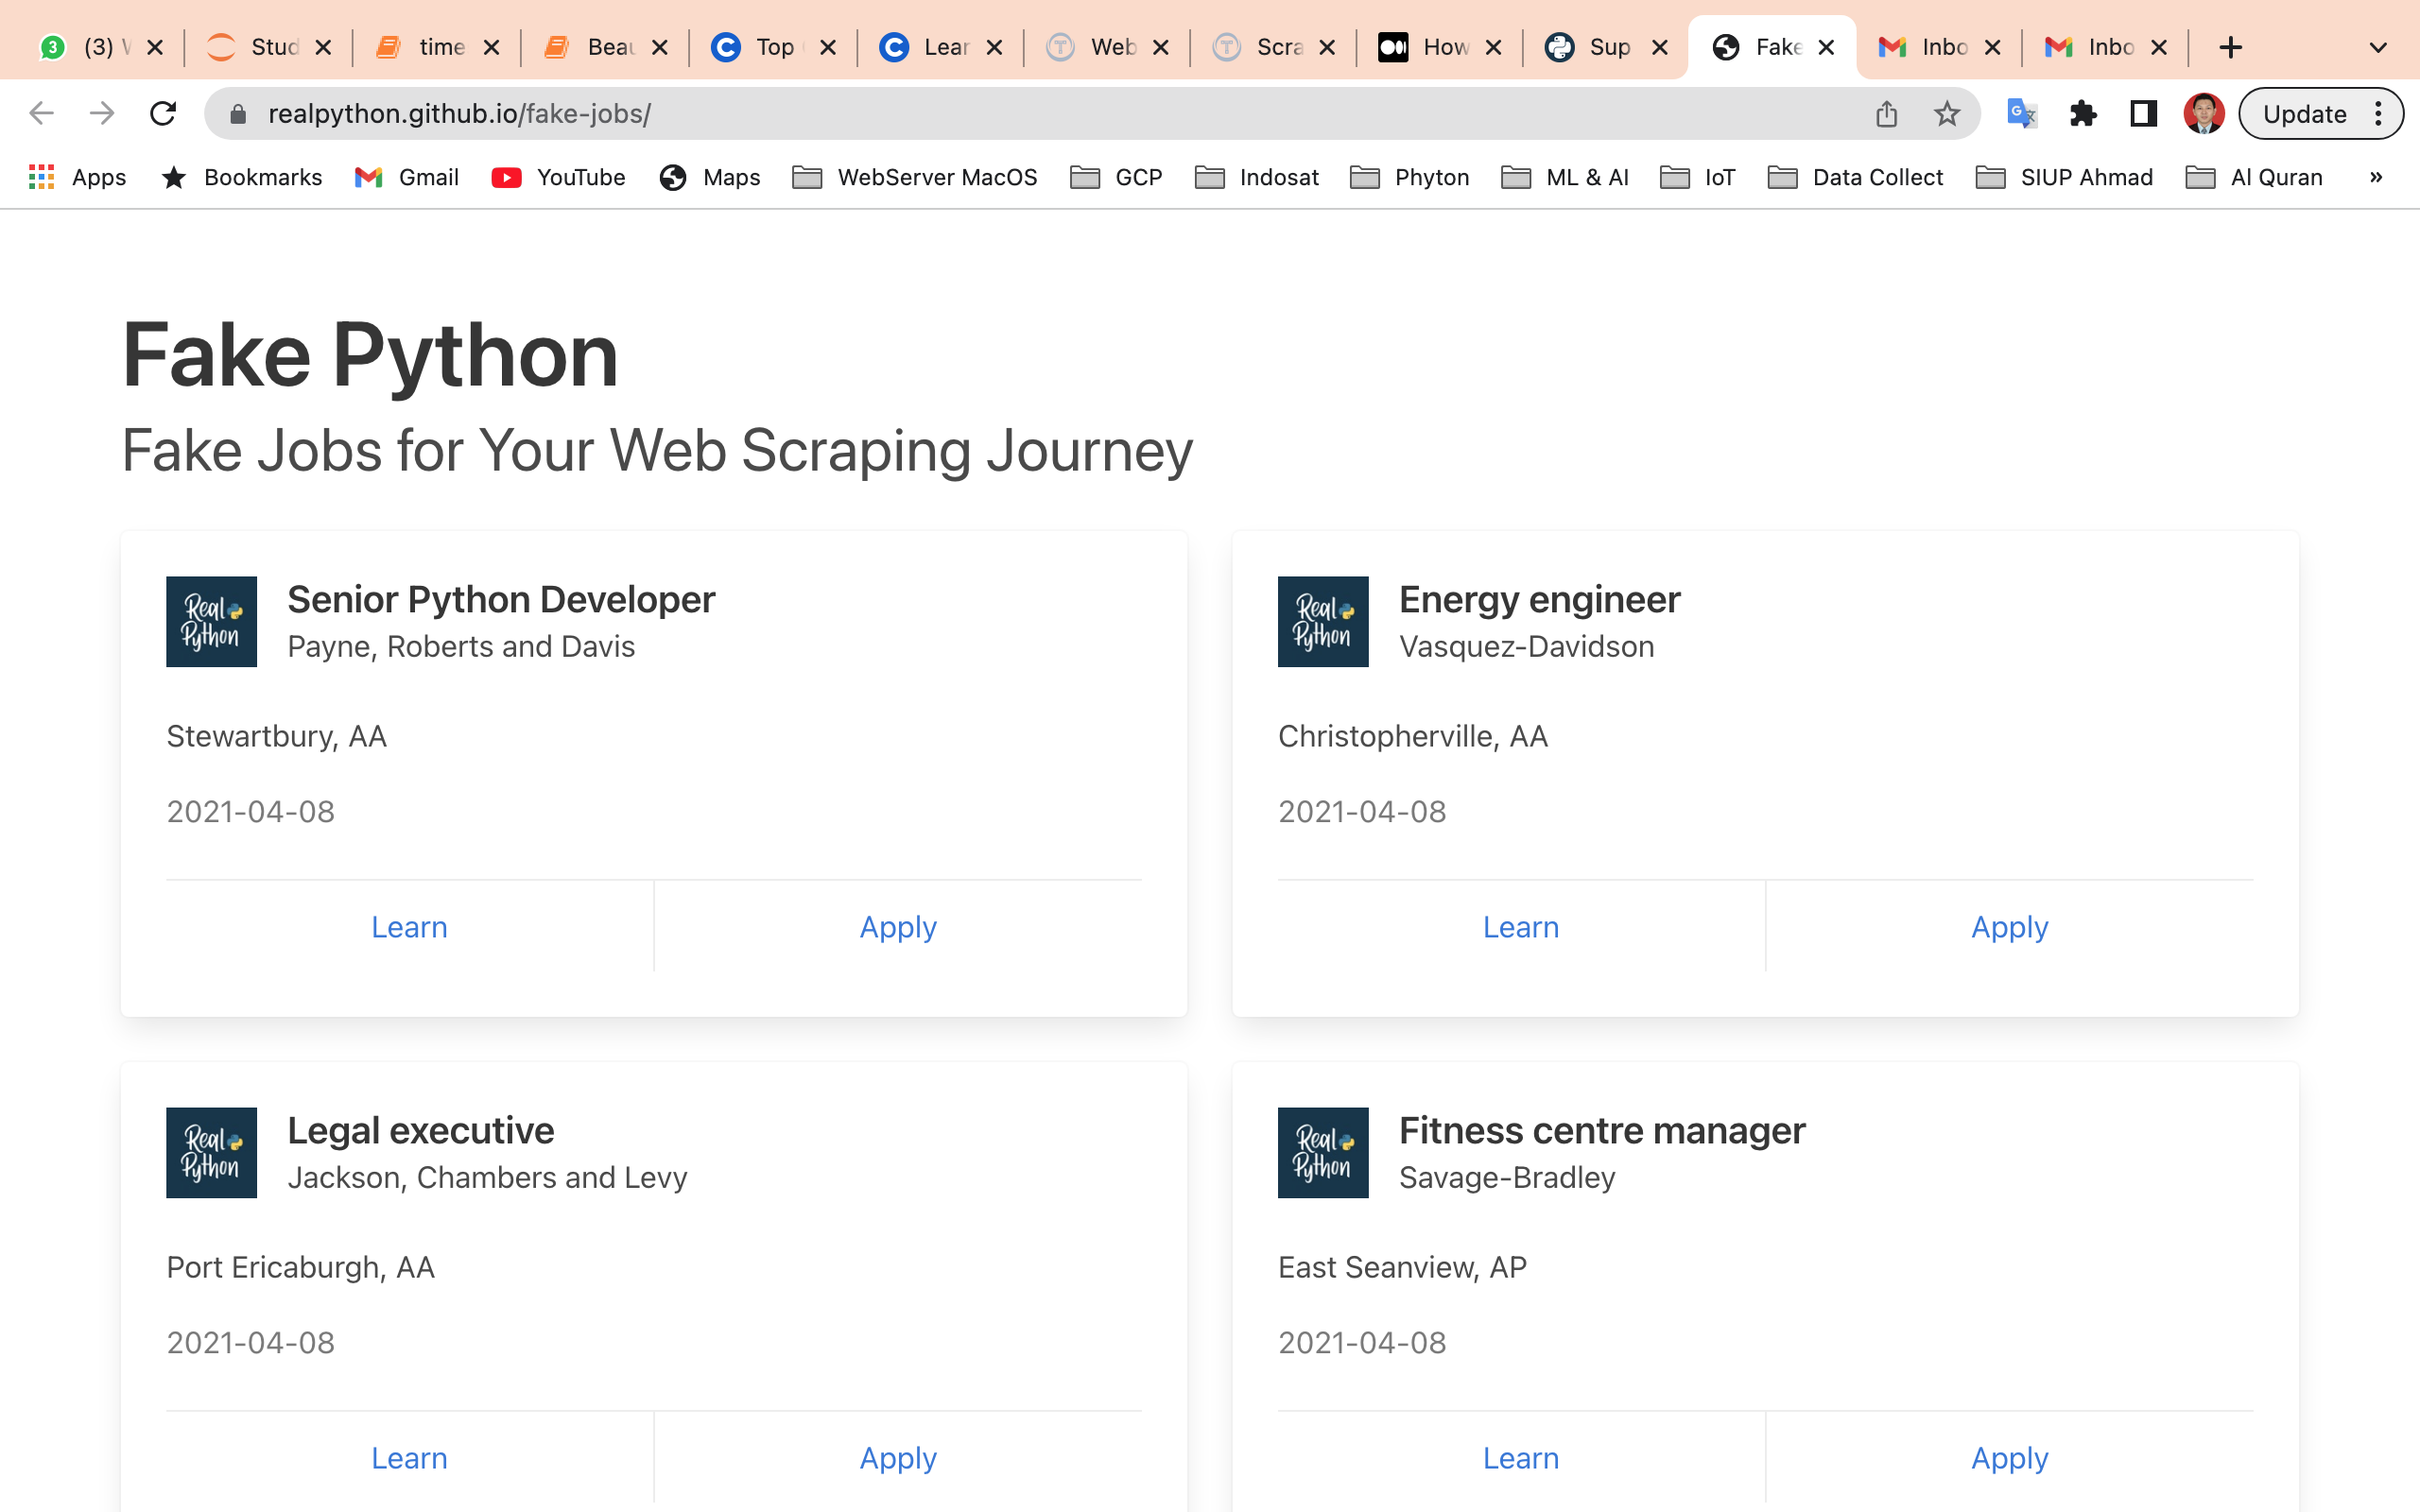

+ Many job postings in a card format, and 
+ Each of them has two buttons. 
+ If you click Apply, then you’ll see a new page that contains more detailed descriptions of the selected job. 
+ You might also notice that the URL in your browser’s address bar changes when you interact with the website.

<a id='3.2'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 1.2 Decipher the Information in URLs</p>

+ Misalnya, Anda mungkin berada di laman detail yang memiliki URL berikut:
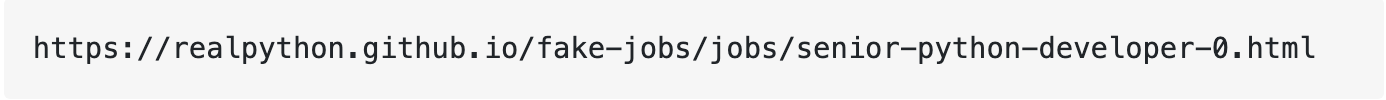

+ Anda dapat mendekonstruksi URL di atas menjadi dua bagian utama:

    1. URL dasar mewakili jalur ke fungsi penelusuran situs web. Pada contoh di atas, URL dasarnya adalah https://realpython.github.io/fake-jobs/.
    2. Lokasi situs spesifik yang diakhiri dengan .html adalah jalur ke sumber daya unik deskripsi pekerjaan.
    

+ Pekerjaan apa pun yang diposting di situs web ini akan menggunakan URL dasar yang sama. 
+ Namun, lokasi sumber daya unik akan berbeda tergantung pada posting pekerjaan tertentu yang Anda lihat.
+ Beberapa situs web menggunakan parameter kueri untuk menyandikan nilai yang Anda kirim saat melakukan penelusuran.

<a id='3.3'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 1.3 Inspect the Site Using Developer Tools</p>

+ Alat pengembang memungkinkan Anda menjelajahi model objek dokumen (DOM) situs secara interaktif untuk lebih memahami sumber Anda. Untuk menggali DOM laman Anda, pilih tab Elemen di alat pengembang. Anda akan melihat struktur dengan elemen HTML yang dapat diklik.

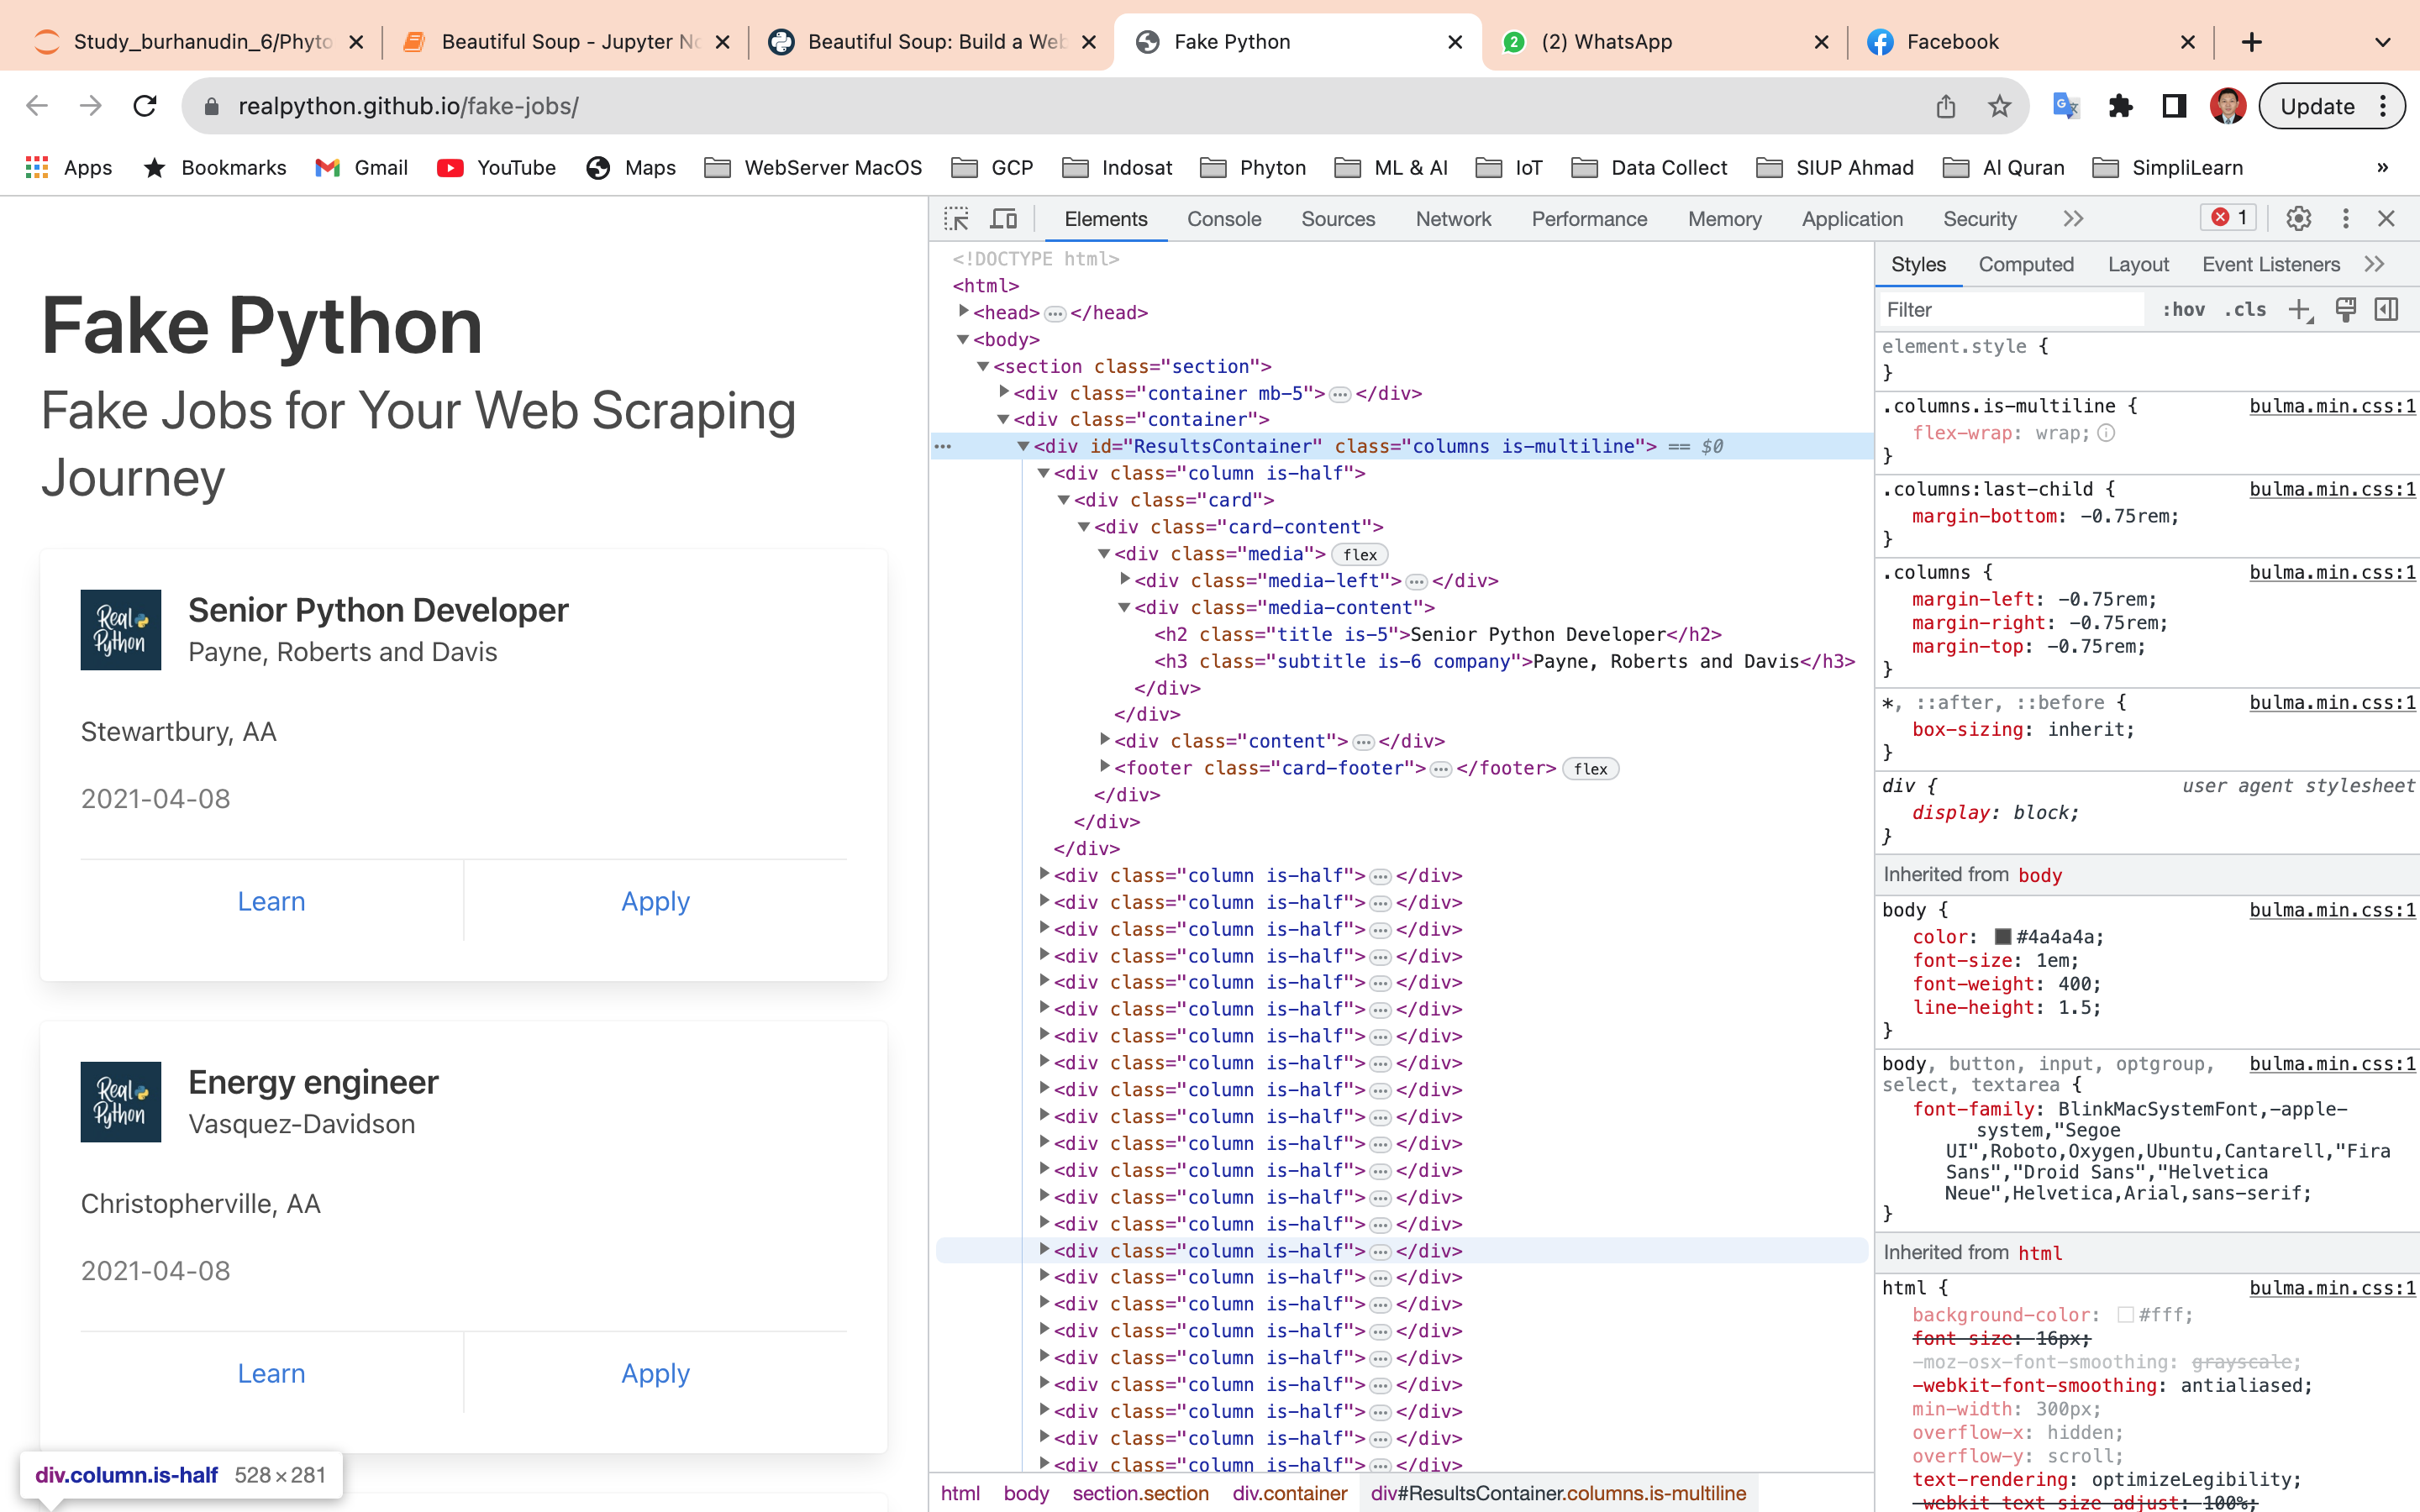

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">Step 2: Scrape HTML Content From a Page</p>

In [3]:
# First, you’ll want to get the site’s HTML code into your Python script so that you can interact with it. 
# For this task, you’ll use Python’s requests library.


import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text)

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1">
    <title>Fake Python</title>
    <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css">
  </head>
  <body>
  <section class="section">
    <div class="container mb-5">
      <h1 class="title is-1">
        Fake Python
      </h1>
      <p class="subtitle is-3">
        Fake Jobs for Your Web Scraping Journey
      </p>
    </div>
    <div class="container">
    <div id="ResultsContainer" class="columns is-multiline">
    <div class="column is-half">
<div class="card">
  <div class="card-content">
    <div class="media">
      <div class="media-left">
        <figure class="image is-48x48">
          <img src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1" alt="Real Python Logo">
        </figure>
      </div>
      <div class="media-content">
        <h2 class="title is-

<a id='4.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 2.1 Static Websites</p>

+ Dalam skenario ini, server yang menghosting situs mengirimkan kembali dokumen HTML yang sudah berisi semua data yang akan Anda lihat sebagai pengguna.

+ Saat Anda memeriksa halaman dengan alat pengembang sebelumnya, Anda menemukan bahwa postingan pekerjaan terdiri dari HTML yang panjang dan tampak berantakan berikut ini:

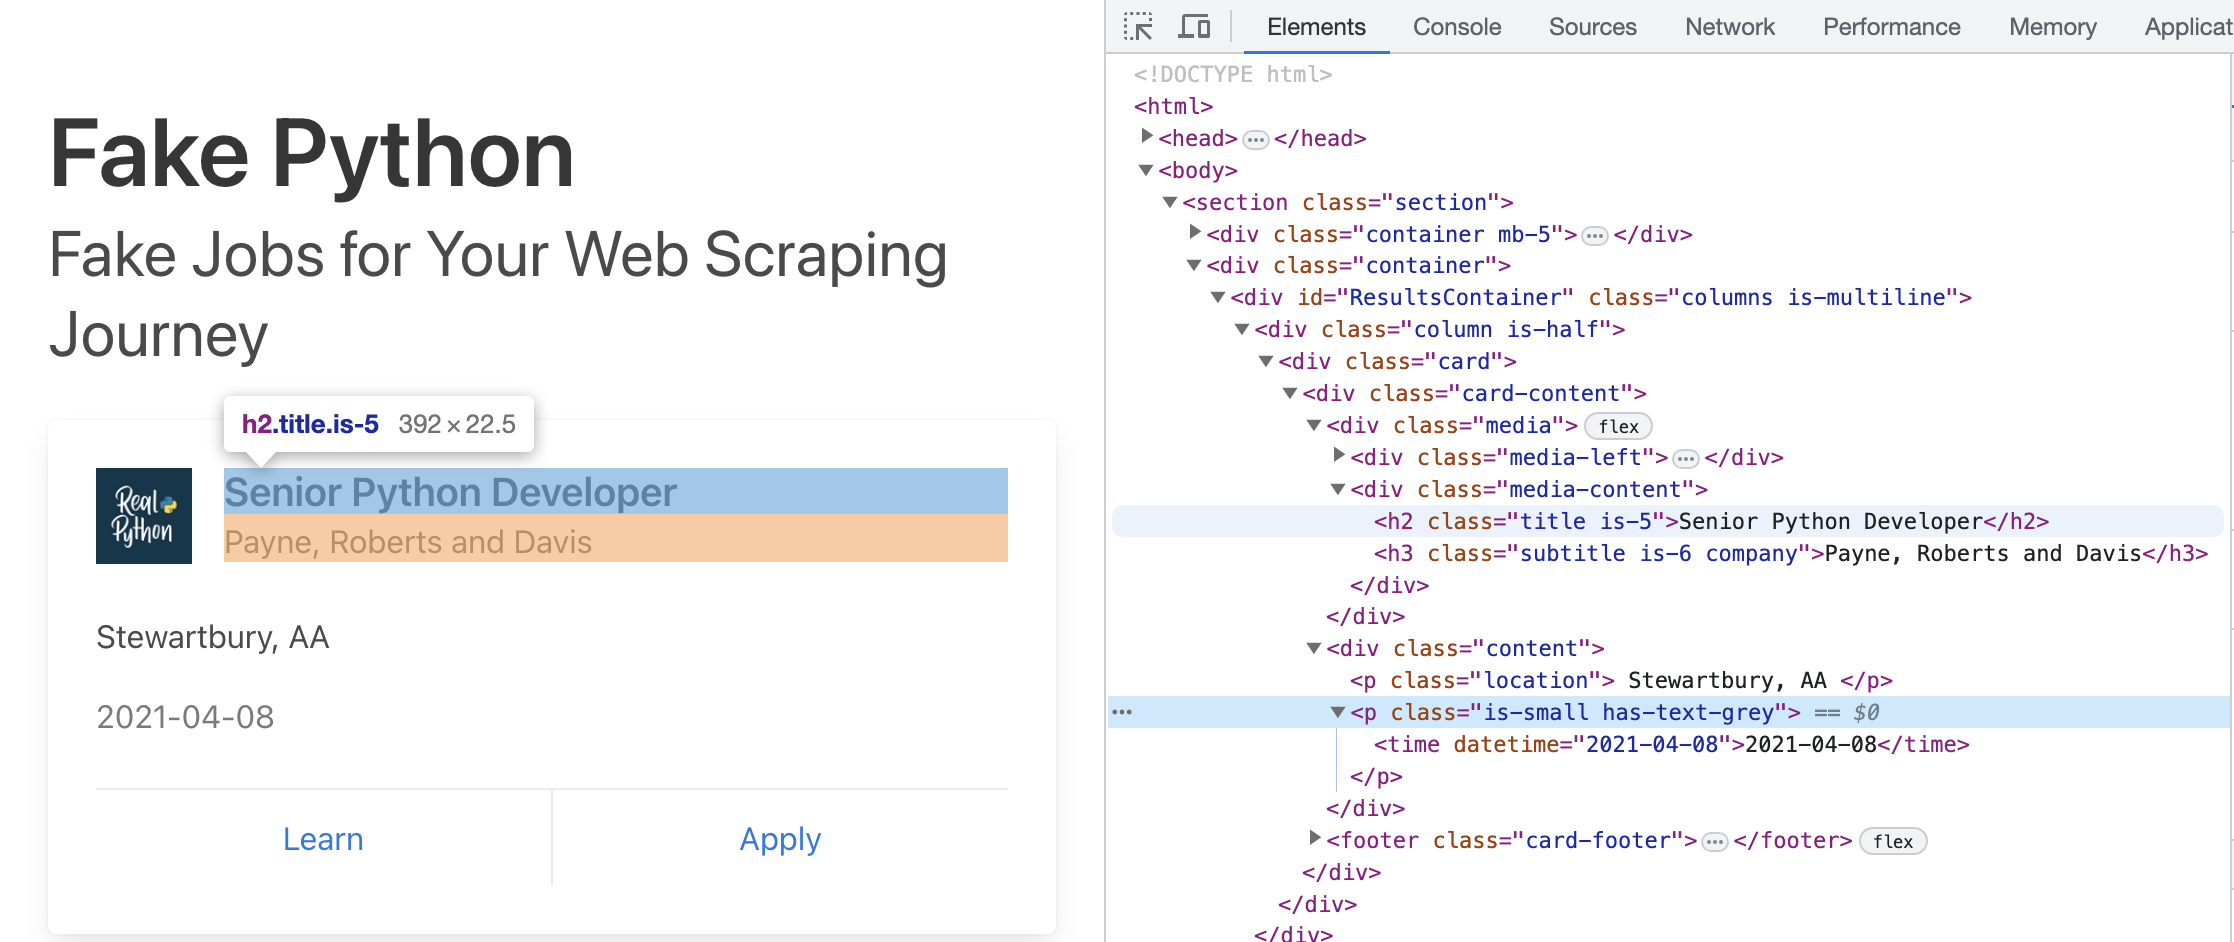

+ HTML yang Anda temui terkadang membingungkan. Untungnya, HTML papan pekerjaan ini memiliki nama kelas deskriptif pada elemen yang Anda minati:

    + class="title is-5"berisi judul lowongan pekerjaan.
    + class="subtitle is-6 company"memuat nama perusahaan yang menawarkan posisi tersebut.
    + class="location"berisi lokasi tempat Anda akan bekerja.



<a id='4.2'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 2.2 Hidden Websites</p>

+ Beberapa halaman web berisi informasi yang tersembunyi di balik login. 
+ Denagn itu berarti Anda memerlukan akun untuk dapat mengambil apa pun dari halaman tersebut. 
+ Proses untuk membuat permintaan HTTP dari skrip Python Anda berbeda dengan cara Anda mengakses halaman dari browser Anda. 
+ Hanya karena Anda dapat masuk ke halaman melalui browser Anda tidak berarti Anda dapat mengikisnya dengan skrip Python Anda.

<a id='4.3'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 2.3 Dynamic Websites</p>

+ Banyak aplikasi web modern dirancang untuk menyediakan fungsinya dalam kolaborasi dengan browser klien. 
+ Alih-alih mengirimkan halaman HTML, aplikasi ini mengirimkan kode JavaScript yang menginstruksikan browser Anda untuk membuat HTML yang diinginkan. 
+ Aplikasi web mengirimkan konten dinamis dengan cara ini untuk memindahkan pekerjaan dari server ke mesin klien serta menghindari pemuatan ulang halaman dan meningkatkan pengalaman pengguna secara keseluruhan.
+ Saat Anda menggunakan requests, Anda hanya menerima apa yang dikirimkan kembali oleh server. Dalam kasus situs web dinamis, Anda akan mendapatkan beberapa kode JavaScript, bukan HTML. Satu-satunya cara untuk beralih dari kode JavaScript yang Anda terima ke konten yang Anda minati adalah dengan mengeksekusi kode tersebut, seperti yang dilakukan browser Anda. Perpustakaan requeststidak dapat melakukan hal tersebut untuk Anda, namun ada solusi lain yang dapat melakukannya.
+ Misalnya, requests-htmladalah proyek yang dibuat oleh penulis perpustakaan requestsyang memungkinkan Anda merender JavaScript menggunakan sintaks yang mirip dengan sintaks di requests. Ini juga mencakup kemampuan untuk menguraikan data dengan menggunakan **Beautiful Soup** .

<a id='5'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center">Step 3: Parse HTML Code With Beautiful Soup</p>

In [4]:
#  Import the library in your Python script and create a Beautiful Soup object:


import requests
from bs4 import BeautifulSoup  # Membuat  object BeautifulSoup

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

soup = BeautifulSoup(page.content, "html.parser")  # Content diambil dari **page** yang sudah di definisikan

+ Saat Anda menambahkan dua baris kode yang disorot, Anda membuat objek **BeautifulSoup** yang menggunakan **page.content**, yaitu konten HTML yang Anda gores sebelumnya, sebagai inputnya.

+ Argumen kedua, **"html.parser"**, memastikan Anda menggunakan parser yang sesuai untuk konten HTML.

<a id='5.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.1 Find Elements by ID</p>

+ Di halaman web HTML, setiap elemen dapat memiliki idatribut yang ditetapkan. Seperti namanya, idatribut tersebut membuat elemen dapat diidentifikasi secara unik di halaman. Anda dapat mulai mengurai halaman Anda dengan memilih elemen tertentu berdasarkan ID-nya.

+ Elemen yang Anda cari adalah  ( **< div >** ) dengan idatribut yang memiliki nilai **"ResultsContainer"**. Ini memiliki beberapa atribut lain juga, tetapi di bawah ini adalah inti dari apa yang Anda cari:

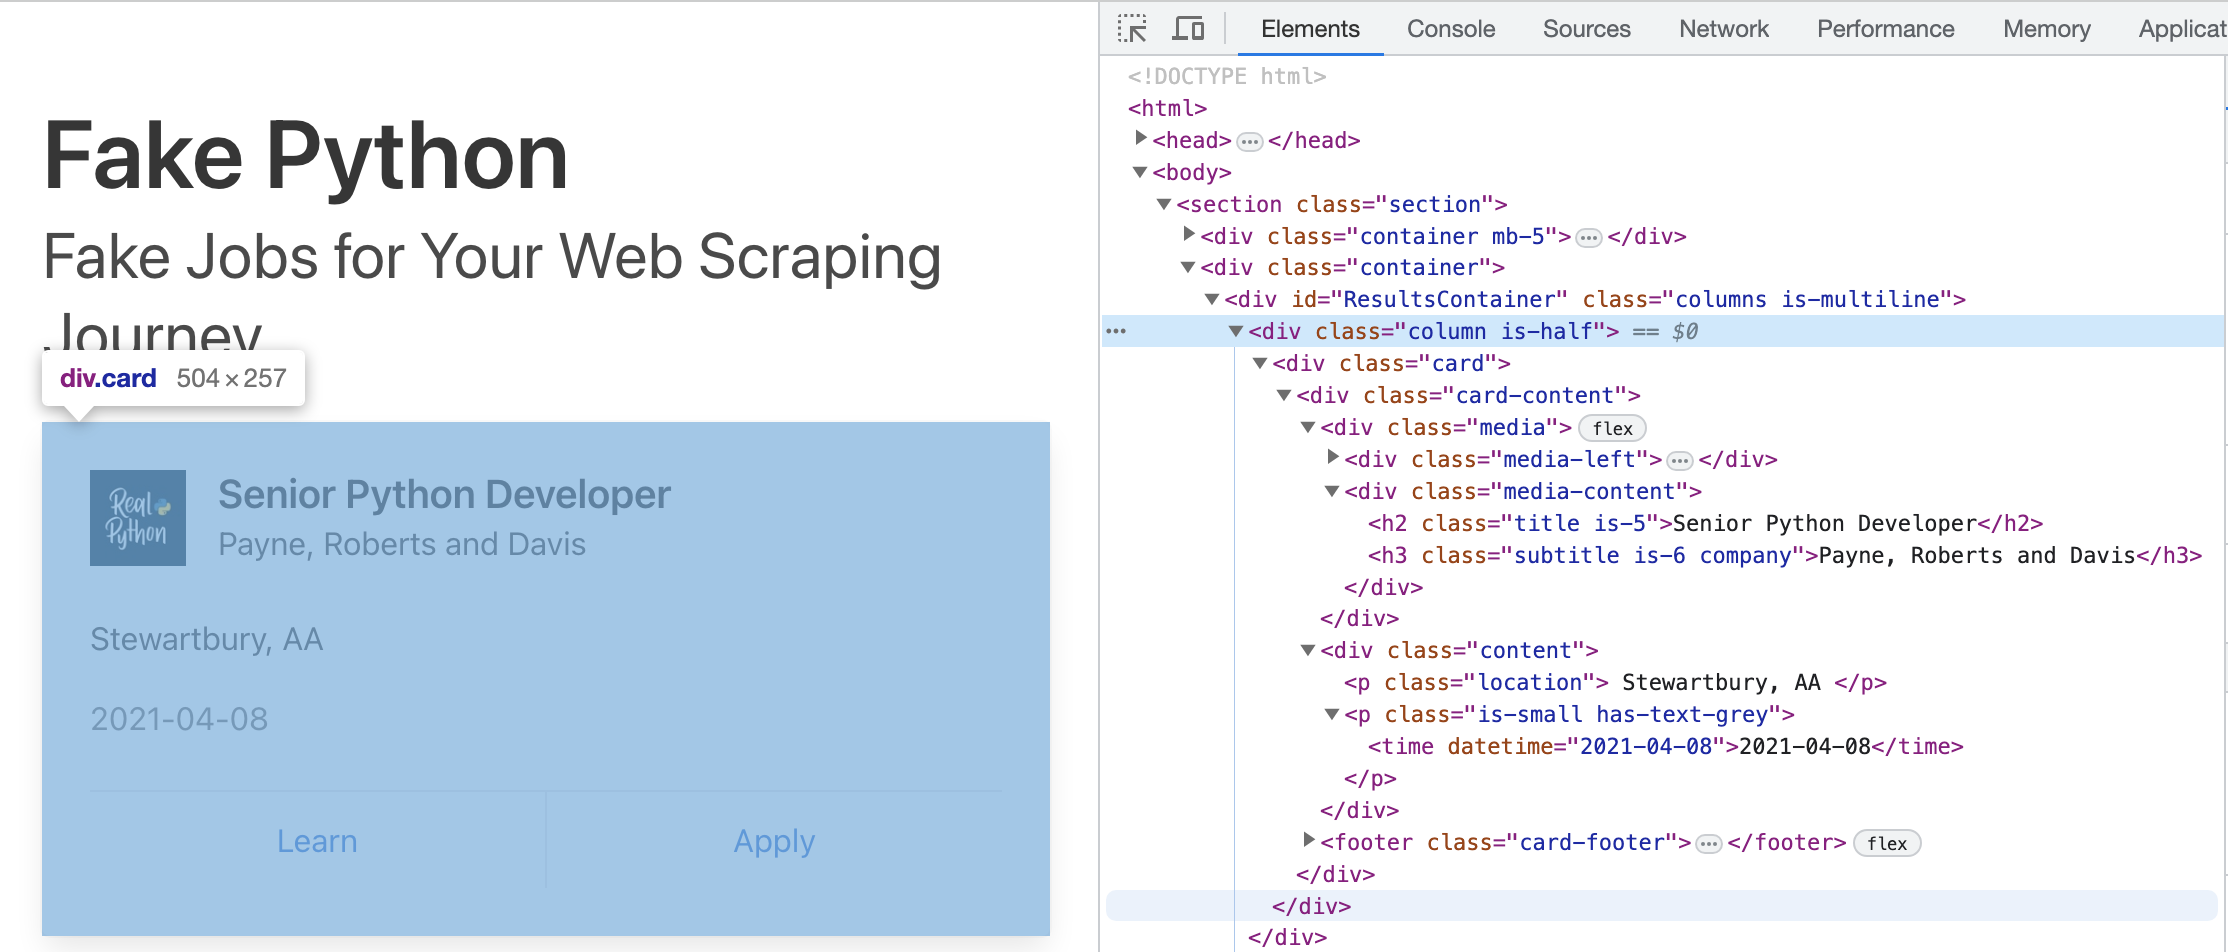

+ Beautiful Soup memungkinkan Anda menemukan elemen HTML tertentu berdasarkan ID-nya:
    
**results = soup.find(id="ResultsContainer")**  

+ Agar lebih mudah dilihat, Anda dapat mempercantik objek Sup Cantik apa pun saat Anda mencetaknya. Jika Anda memanggil .prettify()variabel resultsyang baru saja Anda tetapkan di atas, maka Anda akan melihat semua HTML yang terdapat di dalam  ( < div > ):

**print(results.prettify())**

In [5]:
results = soup.find(id="ResultsContainer")
print(results.prettify())

<div class="columns is-multiline" id="ResultsContainer">
 <div class="column is-half">
  <div class="card">
   <div class="card-content">
    <div class="media">
     <div class="media-left">
      <figure class="image is-48x48">
       <img alt="Real Python Logo" src="https://files.realpython.com/media/real-python-logo-thumbnail.7f0db70c2ed2.jpg?__no_cf_polish=1"/>
      </figure>
     </div>
     <div class="media-content">
      <h2 class="title is-5">
       Senior Python Developer
      </h2>
      <h3 class="subtitle is-6 company">
       Payne, Roberts and Davis
      </h3>
     </div>
    </div>
    <div class="content">
     <p class="location">
      Stewartbury, AA
     </p>
     <p class="is-small has-text-grey">
      <time datetime="2021-04-08">
       2021-04-08
      </time>
     </p>
    </div>
    <footer class="card-footer">
     <a class="card-footer-item" href="https://www.realpython.com" target="_blank">
      Learn
     </a>
     <a class="card-footer-item" href=

<a id='5.2'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.2 Find Elements by HTML Class Name</p>

+ Anda telah melihat bahwa setiap postingan pekerjaan dibungkus dalam sebuah < div > elemen dengan class card-content.
+ Anda dapat bekerja dengan objek baru Anda yang disebut resultsdan memilih hanya lowongan pekerjaan di dalamnya.
+ Ini adalah bagian-bagian HTML yang Anda minati!
+ Anda dapat melakukan ini dalam satu baris kode:

**job_elements = results.find_all("div", class_="card-content")**

+ Coding diatas, memanggil **.find_all()** objek Beautiful Soup, yang menghasilkan sebuah **iterable** yang berisi semua HTML untuk semua daftar pekerjaan yang ditampilkan pada halaman itu.

+ Anda dapat memilih elemen turunan tersebut dari setiap postingan pekerjaan dengan .find():

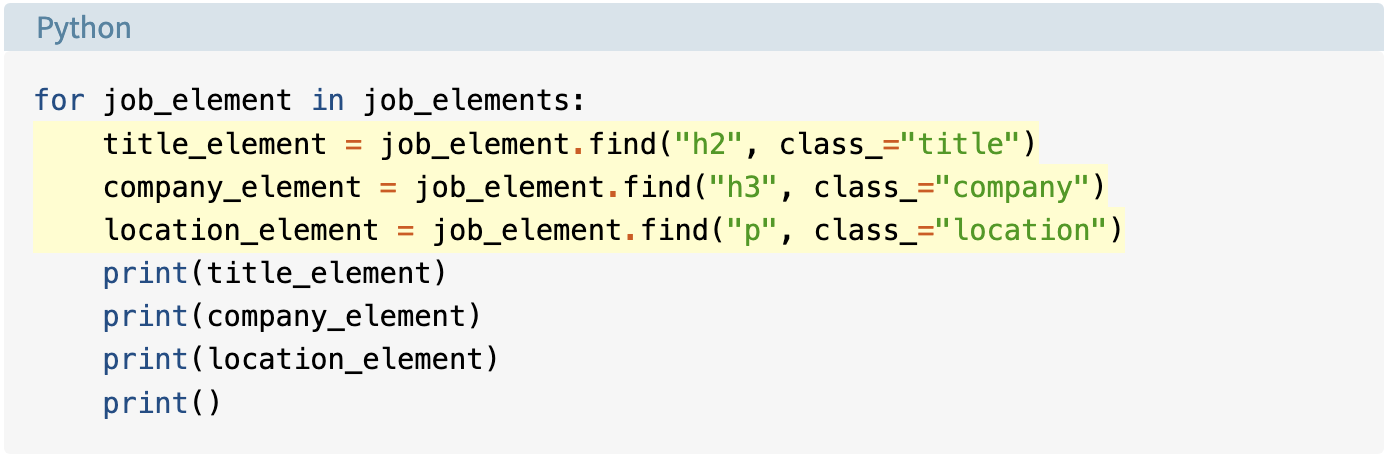

In [8]:
job_elements = results.find_all("div", class_="card-content")


# Look for Python jobs
print("PYTHON JOBS\n==============================\n")
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)
python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")

PYTHON JOBS



<a id='5.3'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.3 Extract Text From HTML Elements</p>

+ Anda hanya ingin melihat judul, perusahaan, dan lokasi setiap postingan pekerjaan. 
+ Dan lihatlah! BeautifulSoup telah membantu Anda. 
+ Anda dapat menambahkan **.text** objek BeautifulSoup untuk menghasilkan hanya konten teks dari elemen HTML yang terdapat dalam objek tersebut:

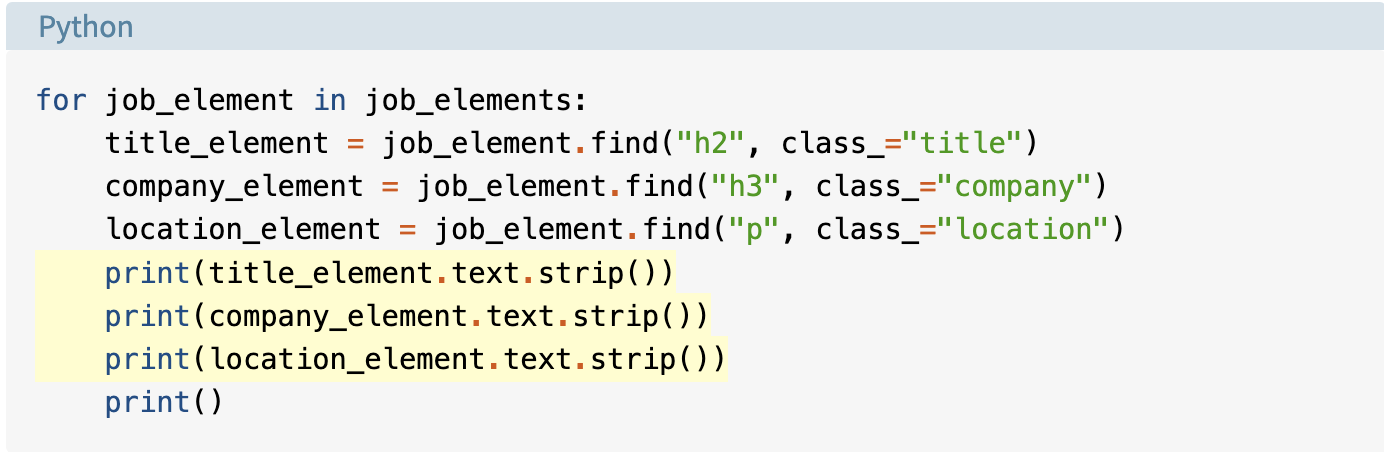

In [9]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA

Energy engineer
Vasquez-Davidson
Christopherville, AA

Legal executive
Jackson, Chambers and Levy
Port Ericaburgh, AA

Fitness centre manager
Savage-Bradley
East Seanview, AP

Product manager
Ramirez Inc
North Jamieview, AP

Medical technical officer
Rogers-Yates
Davidville, AP

Physiological scientist
Kramer-Klein
South Christopher, AE

Textile designer
Meyers-Johnson
Port Jonathan, AE

Television floor manager
Hughes-Williams
Osbornetown, AE

Waste management officer
Jones, Williams and Villa
Scotttown, AP

Software Engineer (Python)
Garcia PLC
Ericberg, AE

Interpreter
Gregory and Sons
Ramireztown, AE

Architect
Clark, Garcia and Sosa
Figueroaview, AA

Meteorologist
Bush PLC
Kelseystad, AA

Audiological scientist
Salazar-Meyers
Williamsburgh, AE

English as a second language teacher
Parker, Murphy and Brooks
Mitchellburgh, AE

Surgeon
Cruz-Brown
West Jessicabury, AA

Equities trader
Macdonald-Ferguson
Maloneshire, AE


<a id='5.4'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.4 Find Elements by Class Name and Text Content</p>

+ Anda tahu bahwa jabatan di halaman disimpan dalam < h2 > elemen. Untuk memfilter pekerjaan tertentu saja, Anda dapat menggunakan **stringargumen*:

**python_jobs = results.find_all("h2", string="Python")**
    
    

In [11]:
python_jobs = results.find_all("h2", string="Python")
print(python_jobs)

[]


+ Saat Anda menggunakan string=seperti yang Anda lakukan di atas, program Anda mencari string tersebut dengan tepat . Perbedaan ejaan, kapitalisasi, atau spasi apa pun akan menghalangi pencocokan elemen.

<a id='5.5'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.5 Pass a Function to a Beautiful Soup Method</p>

+ Fungsi lambda melihat teks setiap < h2 > elemen, mengubahnya menjadi huruf kecil, dan memeriksa apakah substring "python"ditemukan di mana pun. Anda dapat memeriksa apakah Anda berhasil mengidentifikasi semua pekerjaan Python dengan pendekatan ini:


**python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower())**



In [13]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)
print(len(python_jobs))

10


+ Sepertinya ini saat yang tepat untuk menjalankan forloop Anda dan mencetak judul, lokasi, dan informasi perusahaan dari pekerjaan Python yang Anda identifikasi:

In [16]:


for job_element in python_jobs:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

AttributeError: 'NoneType' object has no attribute 'text'

<a id='5.6'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.6 Identify Error Conditions</p>

+ Saat Anda melihat satu elemen di python_jobs, Anda akan melihat bahwa elemen tersebut hanya terdiri dari < h2 > elemen yang berisi jabatan:


**< h2 class="title is-5">Senior Python Developer< /h2>**

+ Anda mencoba mencari jabatan, nama perusahaan, dan lokasi pekerjaan di setiap elemen di python_jobs, namun setiap elemen hanya berisi teks jabatan.

+ Library penguraian Anda yang rajin masih mencari yang lain juga, dan menghasilkan None karena tidak dapat menemukannya. 
+ Kemudian, print()gagal dengan pesan kesalahan yang ditampilkan saat Anda mencoba mengekstrak **.text** atribut dari salah satu None objek ini.

+ Teks yang Anda cari bersarang di elemen saudara dari < h2 > elemen yang dikembalikan filter Anda.


<a id='5.7'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.7 Access Parent Elements</p>

+ One way to get access to all the information you need is to step up in the hierarchy of the DOM starting from the < h2 > elements that you identified
+ Find the < h2 > element that contains the job title as well as its closest parent element that contains all the information that you’re interested in:

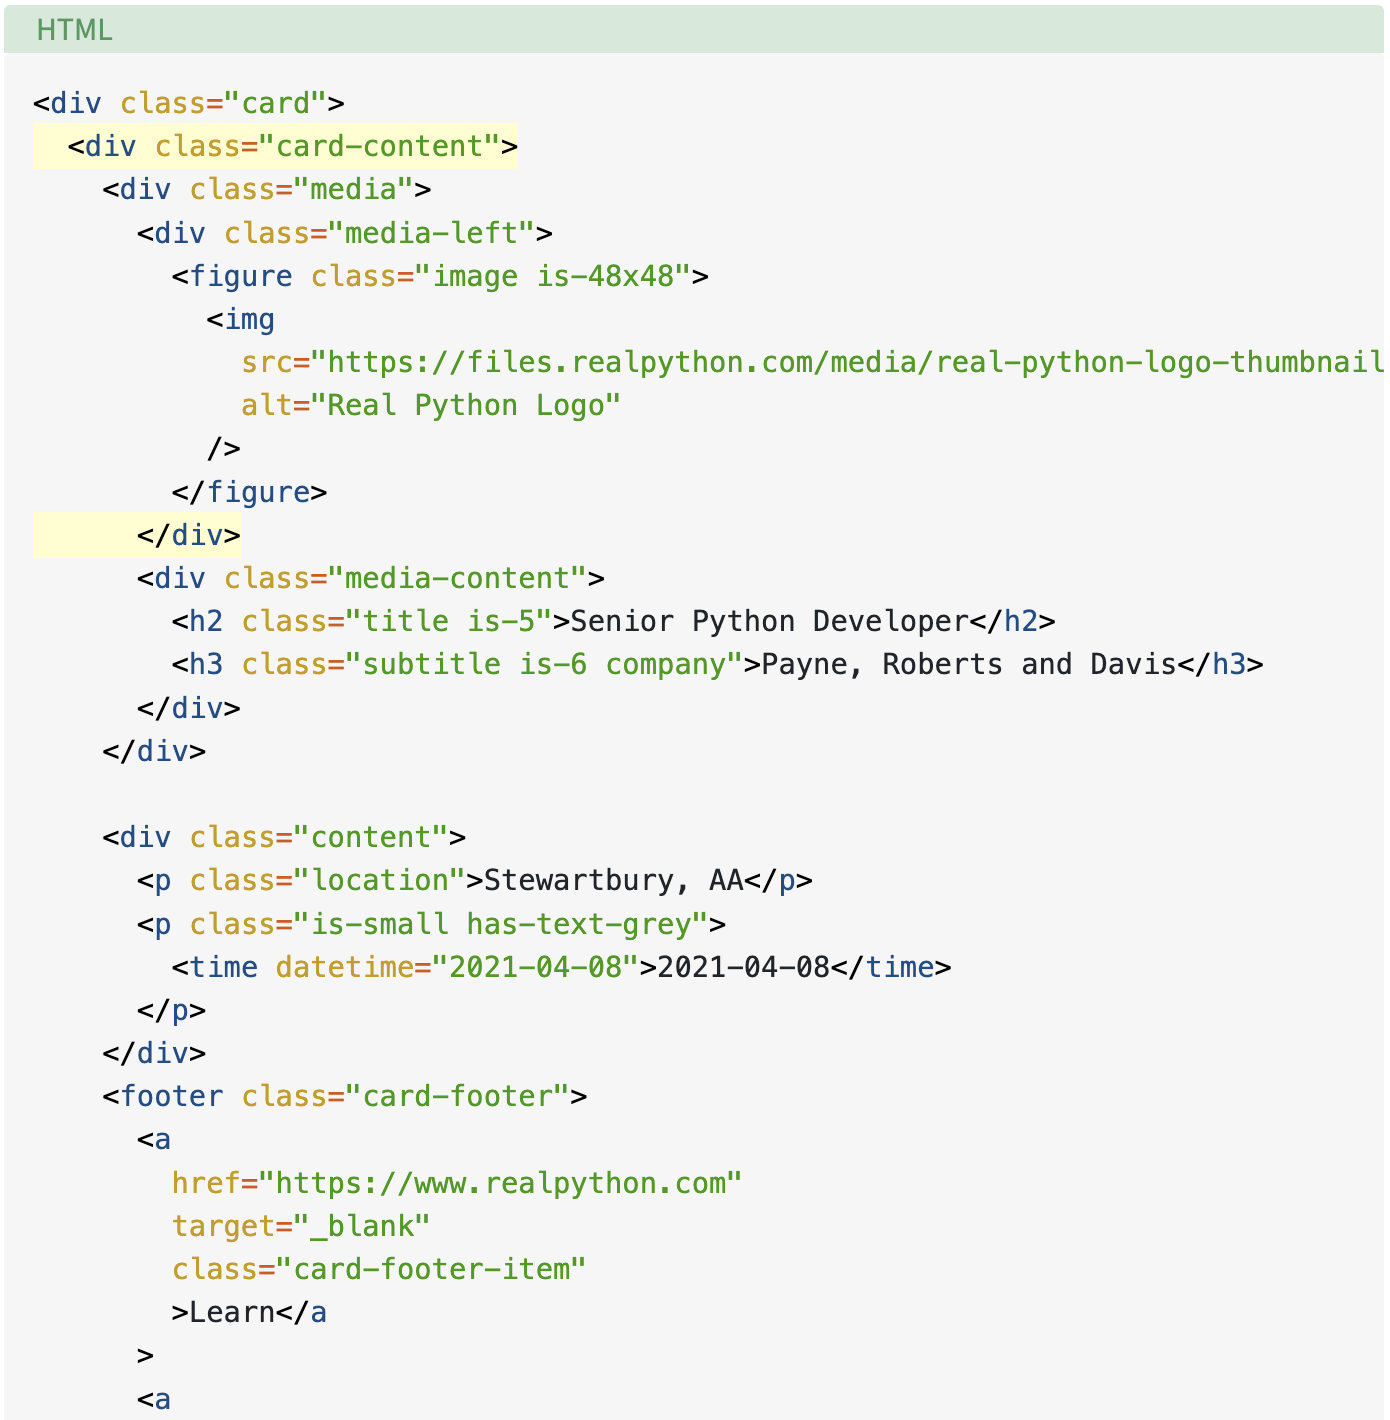

+ The < div > element with the **card-content** class contains all the information you want. 
+ It’s a third-level parent of the < h2 > title element that you found using your filter.



+ Dengan mengingat informasi ini, Anda sekarang dapat menggunakan elemen di dalam **python_jobs** dan mengambil elemen kakek buyutnya untuk mendapatkan akses ke semua informasi yang Anda inginkan:

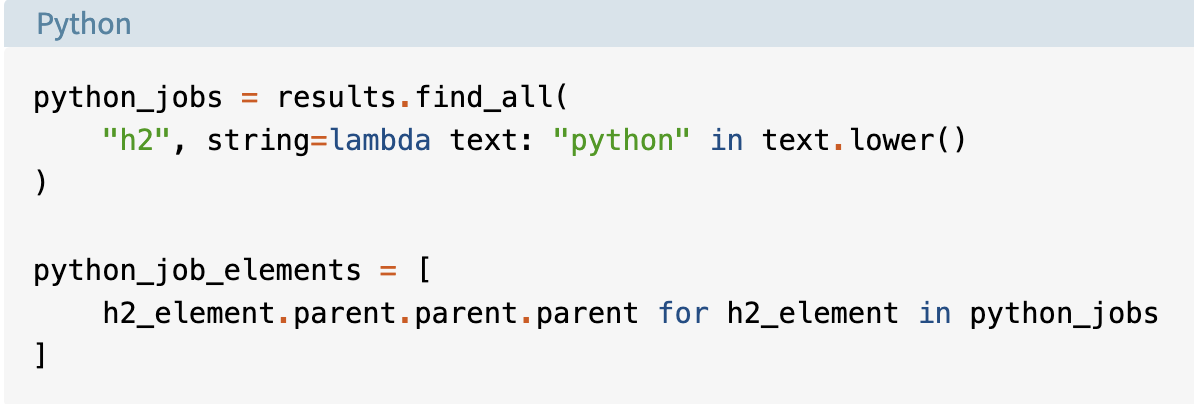

+ You added a list comprehension that operates on each of the < h2 > title elements in python_jobs that you got by filtering with the lambda expression. 
+ You’re selecting the parent element of the parent element of the parent element of each < h2 > title element. That’s three generations up!
+ When you were looking at the HTML of a single job posting, you identified that this specific parent element with the class name card-content contains all the information you need.


+ Now you can adapt the code in your for loop to iterate over the parent elements instead:

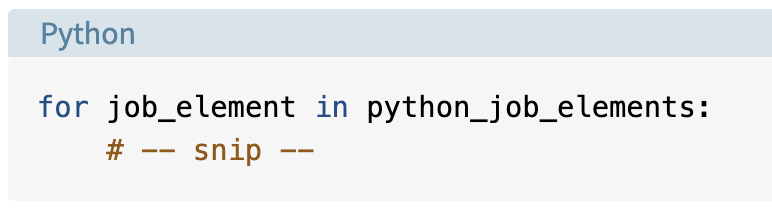

+ When you run your script another time, you’ll see that your code once again has  access to all the relevant information. That’s because you’re now looping over the < div class="card-content" > elements instead of just the < h2 > title elements.

+ Using the .parent attribute that each Beautiful Soup object comes with gives you an intuitive way of stepping through your DOM structure and addressing the elements you need. 

+ You can also access child elements and sibling elements in a similar manner. Read up on navigating the tree for more information.

<a id='5.8'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center">Step 3.8 Extract Attributes From HTML Elements</p>

+ Dengan mengingat informasi ini, Anda sekarang dapat menggunakan elemen di dalam python_jobsdan mengambil elemen kakek buyutnya untuk mendapatkan akses ke semua informasi yang Anda inginkan:

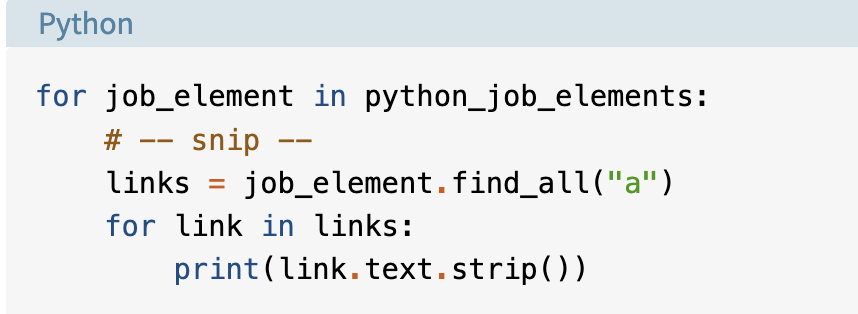

+ Jika Anda menjalankan cuplikan kode ini, Anda akan mendapatkan teks tautan Learndan Applybukan URL terkait.

+ Itu karena .text atribut hanya menyisakan konten elemen HTML yang terlihat. 
+ Ini menghapus semua tag HTML, termasuk atribut HTML yang berisi URL, dan hanya menyisakan teks tautan untuk Anda. 
+ Untuk mendapatkan URL-nya, Anda perlu mengekstrak nilai salah satu atribut HTML alih-alih membuangnya.

+ URL elemen tautan dikaitkan dengan **href** atribut. URL spesifik yang Anda cari adalah nilai atribut tag hrefkedua < a > di bawah HTML satu postingan pekerjaan:

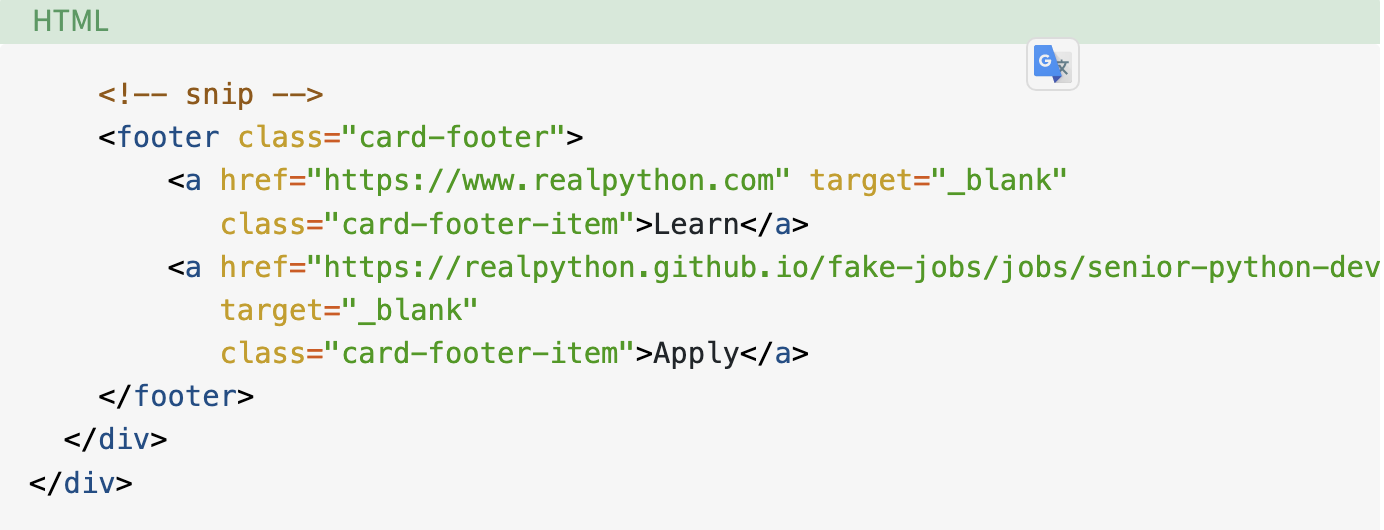

+ Mulailah dengan mengambil semua < a > elemen di kartu pekerjaan. Kemudian, ekstrak nilai atributnya hrefmenggunakan notasi tanda kurung siku:

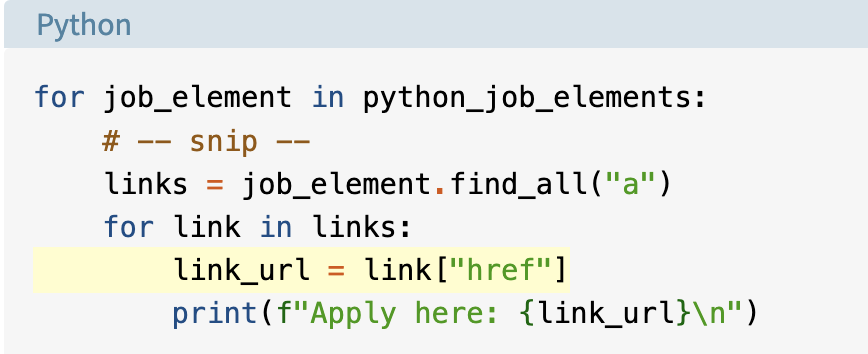


+ Dalam cuplikan kode ini, pertama-tama Anda mengambil semua tautan dari setiap lowongan pekerjaan yang difilter. Kemudian Anda mengekstrak hrefatribut, yang berisi URL, menggunakan ["href"]dan mencetaknya ke konsol Anda

In [14]:
# Look for Python jobs
print("PYTHON JOBS\n==============================\n")
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)
python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    link_url = job_element.find_all("a")[1]["href"]
    print(f"Apply here: {link_url}\n")
    print()

PYTHON JOBS

Senior Python Developer
Payne, Roberts and Davis
Stewartbury, AA
Apply here: https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html


Software Engineer (Python)
Garcia PLC
Ericberg, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/software-engineer-python-10.html


Python Programmer (Entry-Level)
Moss, Duncan and Allen
Port Sara, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-20.html


Python Programmer (Entry-Level)
Cooper and Sons
West Victor, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/python-programmer-entry-level-30.html


Software Developer (Python)
Adams-Brewer
Brockburgh, AE
Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-40.html


Python Developer
Rivera and Sons
East Michaelfort, AA
Apply here: https://realpython.github.io/fake-jobs/jobs/python-developer-50.html


Back-End Web Developer (Python, Django)
Stewart-Alexander
South Kimberly, AA
Appl